# Loan Prediction Using Machine Learning


In [1]:
#Saranya - 1806513
#Sarnav - 1806514
#Saundarya - 1806516

In [2]:
import os
os.listdir()

['.ipynb_checkpoints', 'T&T_MinorProject.ipynb']

In [3]:
os.chdir(r"C:\Users\KIIT\Desktop\Mini")

In [4]:
os.listdir()

['data.csv', 'T&T labProject.xlsx']

In [5]:
#Loading all libraries 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#data1 = pd.read_csv(r"C:\Users\KIIT\Desktop\Mini\train.csv")

# Data Gathering

In [8]:
#loading data
data= pd.read_csv("data.csv")

In [9]:
data.shape     #shape of our dataframe

(614, 13)

In [10]:
data.head()  #to view the top 5 rows of  dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
r_size = len(data.index)    
print(r_size)

614


# Splitting(Train-Test Split)

In [12]:
train = data.iloc[ :409,]                        #train  (top 66%)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
train.shape

(409, 13)

In [14]:
test = data.iloc[409:,]
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
410,LP002318,Female,No,1,Not Graduate,Yes,3867,0.0,62.0,360.0,1.0,Semiurban,N
411,LP002319,Male,Yes,0,Graduate,NaN,6256,0.0,160.0,360.0,NaN,Urban,Y
412,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural,N
413,LP002332,Male,Yes,0,Not Graduate,No,2253,2033.0,110.0,360.0,1.0,Rural,Y


In [15]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
404,LP002301,Female,No,0,Graduate,Yes,7441,0.0,194.0,360.0,1.0,Rural,N
405,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,Y
406,LP002308,Male,Yes,0,Not Graduate,No,2167,2400.0,115.0,360.0,1.0,Urban,Y
407,LP002314,Female,No,0,Not Graduate,No,2213,0.0,66.0,360.0,1.0,Rural,Y
408,LP002315,Male,Yes,1,Graduate,No,8300,0.0,152.0,300.0,0.0,Semiurban,N


In [16]:
test.shape

(205, 13)

# Data Preprocessing

In [17]:
#data cleaning and finding missing value

In [18]:
train.info()  #describing the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            409 non-null    object 
 1   Gender             403 non-null    object 
 2   Married            407 non-null    object 
 3   Dependents         398 non-null    object 
 4   Education          409 non-null    object 
 5   Self_Employed      387 non-null    object 
 6   ApplicantIncome    409 non-null    int64  
 7   CoapplicantIncome  409 non-null    float64
 8   LoanAmount         394 non-null    float64
 9   Loan_Amount_Term   397 non-null    float64
 10  Credit_History     377 non-null    float64
 11  Property_Area      409 non-null    object 
 12  Loan_Status        409 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 41.7+ KB


In [19]:
train.dtypes.value_counts()   #no. of colums of each 

object     8
float64    4
int64      1
dtype: int64

In [20]:
print(len(train.index))             #Checking the number of rows in the DataFrame

409


In [21]:
train.dtypes       #checking the datatype of each column 

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [22]:
train.apply(lambda x: sum(x.isnull()),axis=0) # checking missing values in each column of train dataset

Loan_ID               0
Gender                6
Married               2
Dependents           11
Education             0
Self_Employed        22
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           15
Loan_Amount_Term     12
Credit_History       32
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
[col for col in data.columns if train[col].isnull().sum() > 0]    #checking for null values

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [24]:
train['Gender'].value_counts()

Male      327
Female     76
Name: Gender, dtype: int64

In [25]:
#since Gender is nominal variable we go for MODE(majority) to fill the null value

In [26]:
train.Gender = train.Gender.fillna('Male')

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [27]:
#since Married is nominal variable we go for MODE(majority) to fill the null value

In [28]:
train['Married'].value_counts()

Yes    262
No     145
Name: Married, dtype: int64

In [29]:
train.Married = train.Married.fillna('Yes')

In [30]:
#since Dependents is nominal variable we go for MODE(majority) to fill the null value

In [31]:
train['Dependents'].value_counts()

0     238
1      64
2      62
3+     34
Name: Dependents, dtype: int64

In [32]:
train.Dependents = train.Dependents.fillna('0')

In [33]:
#since Self_Employed is nominal variable we go for MODE(majority) to fill the null value

In [34]:
train['Self_Employed'].value_counts()

No     337
Yes     50
Name: Self_Employed, dtype: int64

In [35]:
train.Self_Employed = train.Self_Employed.fillna('No')

In [36]:
#since LoanAmount is a continous variable we fill the null values with mean

In [37]:
train['LoanAmount'].value_counts()

120.0    19
115.0     8
100.0     8
130.0     8
112.0     7
         ..
650.0     1
45.0      1
173.0     1
42.0      1
63.0      1
Name: LoanAmount, Length: 159, dtype: int64

In [38]:
train.LoanAmount = train.LoanAmount.fillna(train.LoanAmount.mean())

In [39]:
#since Loan_Amount_Term is nominal variable we go for MODE(majority) to fill the null value

In [40]:
train['Loan_Amount_Term'].value_counts()

360.0    337
180.0     30
480.0     12
300.0      9
120.0      3
240.0      2
60.0       2
84.0       1
36.0       1
Name: Loan_Amount_Term, dtype: int64

In [41]:
train.Loan_Amount_Term = train.Loan_Amount_Term.fillna(360.0)

In [42]:
#since Credit_History is nominal variable we go for MODE(majority) to fill the null value

In [43]:
train['Credit_History'].value_counts()

1.0    323
0.0     54
Name: Credit_History, dtype: int64

In [44]:
train.Credit_History = train.Credit_History.fillna(1.0)

In [45]:
train.apply(lambda x: sum(x.isnull()),axis=0)    #again checking the null values if any

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [46]:
train.duplicated().sum()      #checking duplicate row 

0

In [47]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,144.817259,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [48]:
[col for col in data.columns if test[col].isnull().sum() > 0]  

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [49]:
test['Gender'].value_counts()

Male      162
Female     36
Name: Gender, dtype: int64

In [50]:
test.Gender = test.Gender.fillna('Male')

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [51]:
test['Married'].value_counts()

Yes    136
No      68
Name: Married, dtype: int64

In [52]:
test.Married = test.Married.fillna('Yes')

In [53]:
test['Dependents'].value_counts()

0     107
2      39
1      38
3+     17
Name: Dependents, dtype: int64

In [54]:
test.Dependents = test.Dependents.fillna('0')

In [55]:
test['Self_Employed'].value_counts()

No     163
Yes     32
Name: Self_Employed, dtype: int64

In [56]:
test.Self_Employed = test.Self_Employed.fillna('No')

In [57]:
test['LoanAmount'].value_counts()

110.0    11
100.0     7
187.0     5
150.0     5
160.0     5
         ..
246.0     1
196.0     1
103.0     1
36.0      1
350.0     1
Name: LoanAmount, Length: 115, dtype: int64

In [58]:
test.LoanAmount = test.LoanAmount.fillna(train.LoanAmount.mean())

In [59]:
test['Loan_Amount_Term'].value_counts()

360.0    175
180.0     14
300.0      4
84.0       3
480.0      3
240.0      2
36.0       1
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [60]:
test.Loan_Amount_Term = test.Loan_Amount_Term.fillna(360.0)

In [61]:
test['Credit_History'].value_counts()

1.0    152
0.0     35
Name: Credit_History, dtype: int64

In [62]:
test.Credit_History = test.Credit_History.fillna(1.0)

# EDA 

In [63]:
#Univariate analysis of each column (categorical varable)

<AxesSubplot:title={'center':'Loan_Status'}>

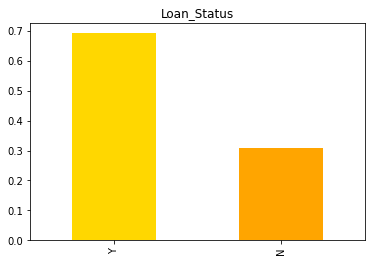

In [64]:
train["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status', color=['gold','orange'])

<AxesSubplot:title={'center':'Gender'}>

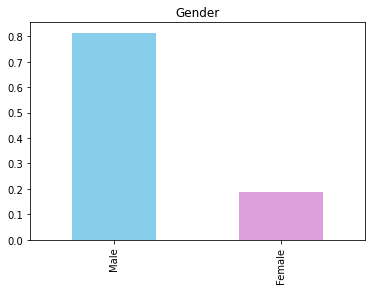

In [65]:
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender',color = ['skyblue','plum'])

<AxesSubplot:title={'center':'Married'}>

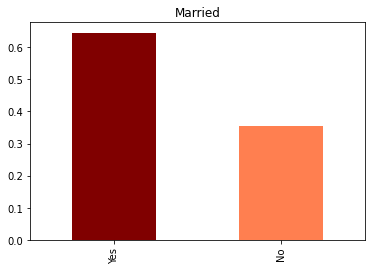

In [66]:
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married' , color=['maroon','coral'])

<AxesSubplot:title={'center':'Self_Employed'}>

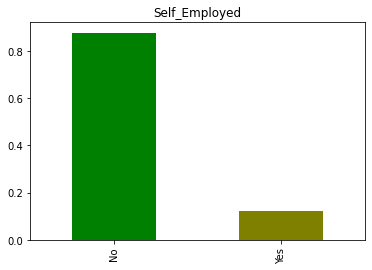

In [67]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed', color = ['green','olive'])

<AxesSubplot:title={'center':'Credit_History'}>

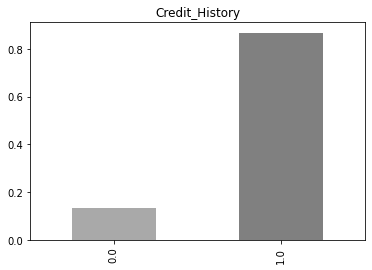

In [68]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History', color = ['grey','darkgrey'])

<AxesSubplot:title={'center':'Dependents'}>

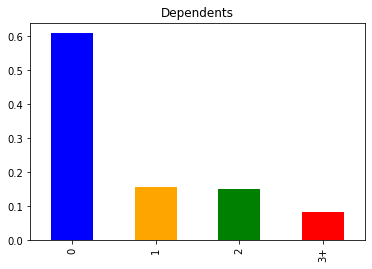

In [69]:
train['Dependents'].value_counts(normalize=True).plot.bar(title="Dependents", color = ['blue','orange','green','red'])

<AxesSubplot:title={'center':'Education'}>

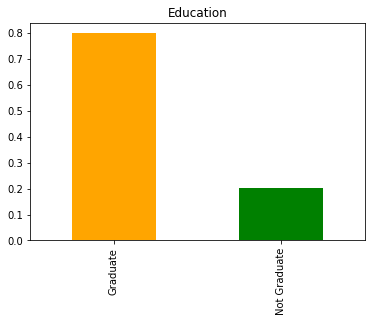

In [70]:
train["Education"].value_counts(normalize=True).plot.bar(title = "Education" , color = ['orange','green'])

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

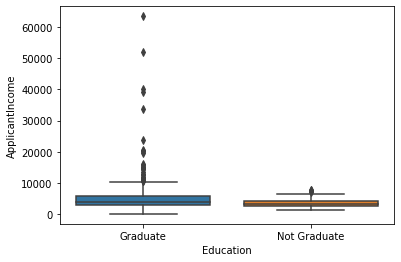

In [71]:
#plt.ylim(0, 20000)
sns.boxplot(x='Education',y='ApplicantIncome',data=train)

<AxesSubplot:title={'center':'Property_Area'}>

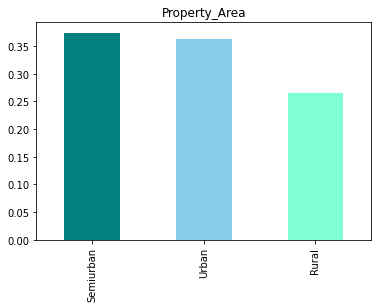

In [72]:
train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area",color = ['teal','skyblue','aquamarine'])

In [73]:
#Continuous variable

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


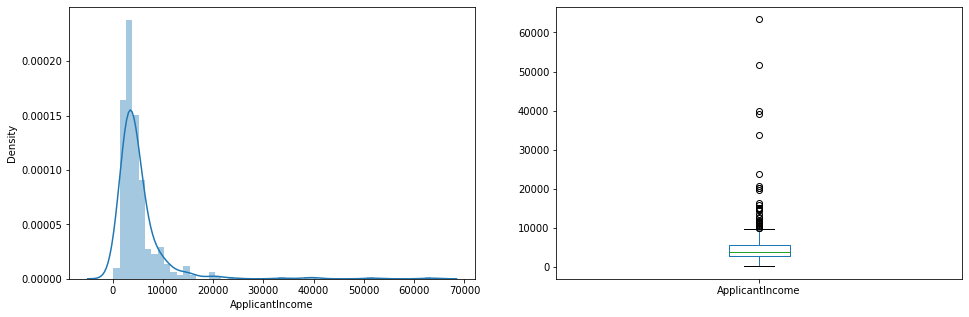

In [74]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["ApplicantIncome"]);

plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

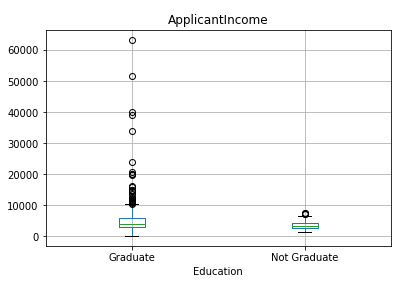

In [75]:
train.boxplot(column='ApplicantIncome',by="Education" )
plt.suptitle(" ")
plt.show()

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


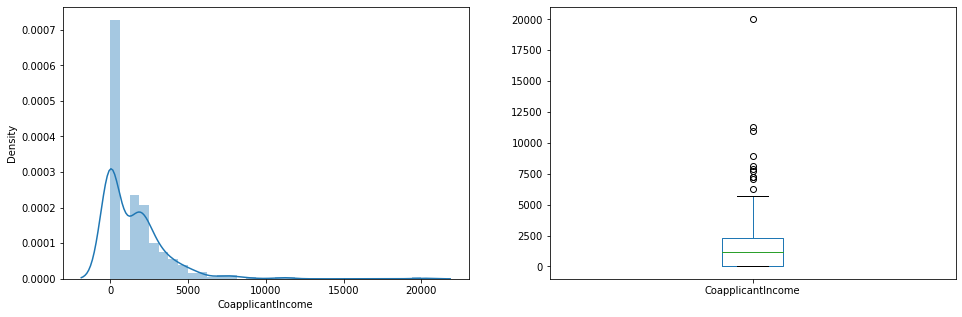

In [76]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["CoapplicantIncome"]);

plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


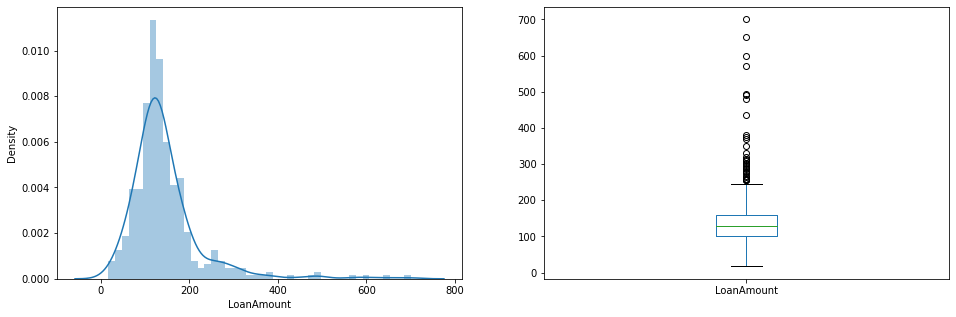

In [77]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


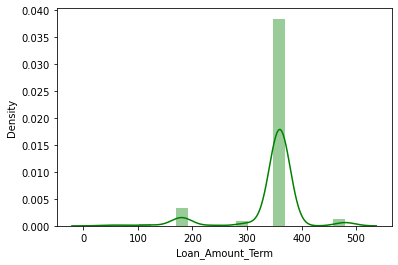

In [78]:
plt.figure(1)
# plt.subplot(121)
df = train.dropna()
sns.distplot(df["Loan_Amount_Term"],color = 'green');

# plt.subplot(122)
# df["Loan_Amount_Term"].plot.box(figsize=(16,5))
# plt.show()

In [79]:
#Bivariant Analysis

In [80]:
#Categorical Independent Variable vs Target Variable

Loan_Status    N    Y
Gender               
Female        26   50
Male         100  233


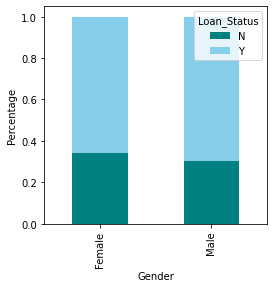

In [81]:
print(pd.crosstab(train["Gender"],train["Loan_Status"]))
Gender = pd.crosstab(train["Gender"],train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4),color=['teal','skyblue'])
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

Loan_Status   N    Y
Married             
No           52   93
Yes          74  190


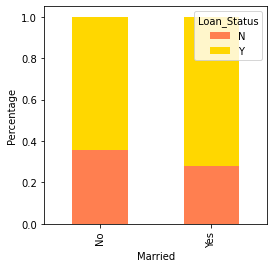

In [82]:
print(pd.crosstab(train["Married"],train["Loan_Status"]))
Married=pd.crosstab(train["Married"],train["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4),color = ['coral','gold'])
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Loan_Status   N    Y
Dependents          
0            77  172
1            24   40
2            12   50
3+           13   21


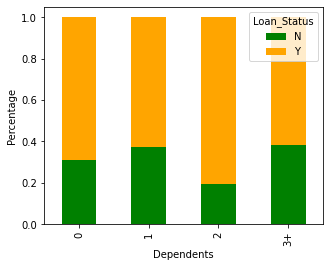

In [83]:
print(pd.crosstab(train['Dependents'],train["Loan_Status"]))
Dependents = pd.crosstab(train['Dependents'],train["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,4),color = ['green','orange'])
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.show()

Loan_Status    N    Y
Education            
Graduate      93  234
Not Graduate  33   49


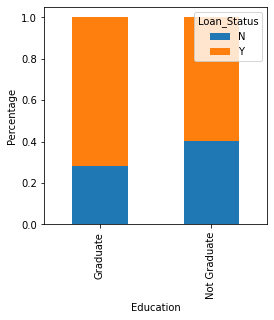

In [84]:
print(pd.crosstab(train["Education"],train["Loan_Status"]))
Education = pd.crosstab(train["Education"],train["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()

Loan_Status    N    Y
Education            
Graduate      93  234
Not Graduate  33   49


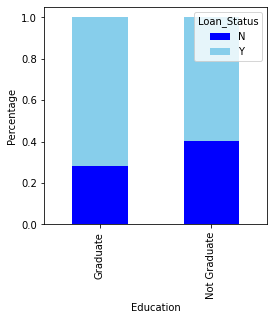

In [85]:
print(pd.crosstab(train["Education"],train["Loan_Status"]))
Education = pd.crosstab(train["Education"],train["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4),color = ['blue','skyblue'])
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()

Loan_Status      N    Y
Self_Employed          
No             109  250
Yes             17   33


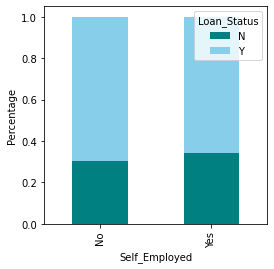

In [86]:
print(pd.crosstab(train["Self_Employed"],train["Loan_Status"]))
SelfEmployed = pd.crosstab(train["Self_Employed"],train["Loan_Status"])
SelfEmployed.div(SelfEmployed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4),color =['teal','skyblue'])
plt.xlabel("Self_Employed")
plt.ylabel("Percentage")
plt.show()

Loan_Status      N    Y
Credit_History         
0.0             49    5
1.0             77  278


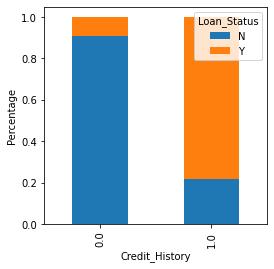

In [87]:
print(pd.crosstab(train["Credit_History"],train["Loan_Status"]))
CreditHistory = pd.crosstab(train["Credit_History"],train["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")
plt.show()

Loan_Status     N    Y
Property_Area         
Rural          44   64
Semiurban      33  120
Urban          49   99


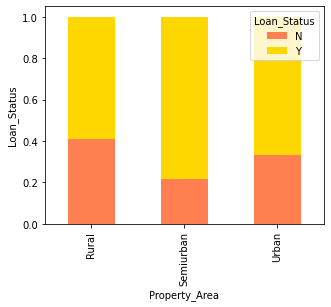

In [88]:
print(pd.crosstab(train["Property_Area"],train["Loan_Status"]))
PropertyArea = pd.crosstab(train["Property_Area"],train["Loan_Status"])
PropertyArea.div(PropertyArea.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,4),color = ['coral','gold'])
plt.xlabel("Property_Area")
plt.ylabel("Loan_Status")
plt.show()

<AxesSubplot:xlabel='Loan_Status'>

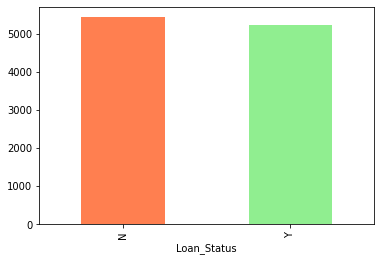

In [89]:
train.groupby("Loan_Status")['ApplicantIncome'].mean().plot.bar(color =['coral','lightgreen'])

In [90]:
#transformation of data to normal curve

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


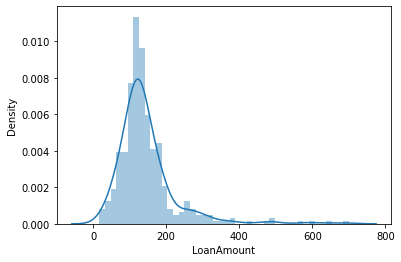

In [91]:
sns.distplot(train["LoanAmount"]);

<AxesSubplot:>

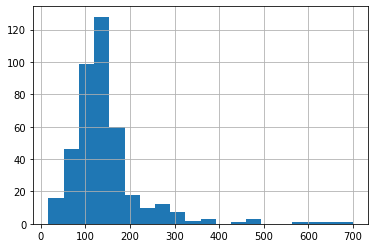

In [92]:
train['LoanAmount'].hist(bins=20)

In [93]:
#since the curve is toward left - left Skewed

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

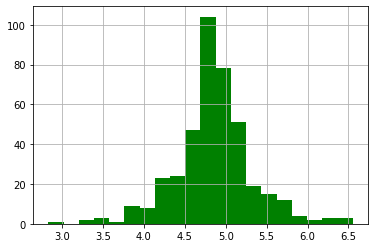

In [94]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20,color ='green')

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount_log', ylabel='Density'>

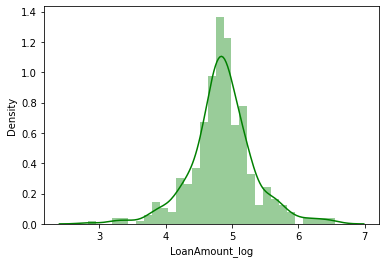

In [95]:
sns.distplot(train["LoanAmount_log"],color = "green")

In [96]:
#mapping the logtransform to test set
test["LoanAmount_log"]=np.log(test["LoanAmount"])

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
total_female = 0
total_male = 0

for i in train['Gender']:
    if(i == 'Female'):
        total_female = total_female + 1
    else:
         total_male = total_male + 1

print("Total Female:",total_female)
print("Total Male:",total_male)

Total Female: 76
Total Male: 333


In [98]:
female_count = 0
male_count = 0

for i,j in zip(train['Gender'],train['Loan_Status']):
    if(i == 'Female' and j == 'Y'):
        female_count = female_count + 1
    elif(i == 'Male' and j == 'Y'):
        male_count = male_count + 1

#Ratio (Percentage)
f = (female_count/total_female) * 100
m = (male_count/total_male) * 100

print("Female %: ",f)
print("Male %: ",m)

Female %:  65.78947368421053
Male %:  69.96996996996997


In [99]:
one = 0
two = 0
three = 0

for i in train['Dependents']:
    if(i == '1'):
        one = one + 1
    elif(i == '2'):
        two = two + 1
    else:
         three = three + 1

print("1: ",one)
print("2: ",two)
print("3: ",three)

1:  64
2:  62
3:  283


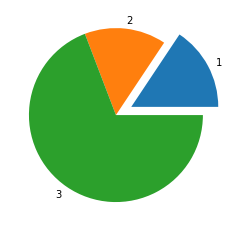

In [100]:
count = [one, two, three]
mylabel = ['1','2','3']
myexplode = [0.2, 0, 0]
plt.pie(count,labels = mylabel,explode = myexplode)
plt.show()

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


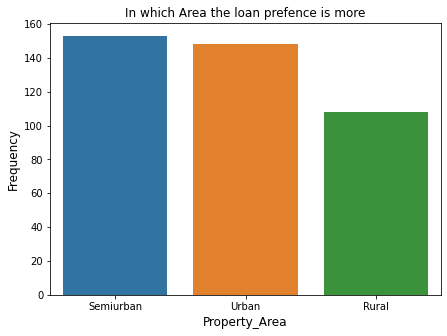

In [101]:
property_Area = train['Property_Area'].value_counts()
x = property_Area.index
y = property_Area.values
plt.figure(figsize=(7,5))

sns.barplot(x,y)
plt.title('In which Area the loan prefence is more')
plt.xlabel('Property_Area', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Feature Engineering 

In [102]:
#Removing Constant Columns ->> Columns which have the same value in the enitre dataset
unique_cols =  [x for x in train.columns if train[x].nunique()==1] 
print(unique_cols)
#train.drop(unique_cols,axis=1,inplace=True)
#train.columns

[]


In [103]:
#Encoding(Label Encoding)

In [104]:
train.Gender=train.Gender.map({'Male':1,'Female':0})
train.Gender.value_counts()

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


1    333
0     76
Name: Gender, dtype: int64

In [105]:
train.Married=train.Married.map({'Yes':1,'No':0})
train.Dependents=train.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
train.Education=train.Education.map({'Graduate':1,'Not Graduate':0})
train.Self_Employed=train.Self_Employed.map({'Yes':1,'No':0})
train.Property_Area=train.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
train.Loan_Status = train.Loan_Status.map({'Y':1,'N':0})

In [106]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [107]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Income_bin
0,LP001002,1,0,0,1,0,5849,0.0,144.817259,360.0,1.0,2,1,4.975473,High
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,High
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,Average
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,Average
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,High


Loan_Status   0    1
Income_bin          
Low          22   50
Average      39  109
High         33   70
Very high    32   54


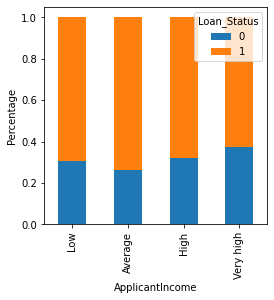

In [108]:
print(pd.crosstab(train["Income_bin"],train["Loan_Status"]))
Income_bin = pd.crosstab(train["Income_bin"],train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

In [109]:
bins=[0,1000,3000,42000]
group =['Low','Average','High']
train['CoapplicantIncome_bin']=pd.cut(train["CoapplicantIncome"],bins,labels=group)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Loan_Status             0    1
CoapplicantIncome_bin         
Low                     1   13
Average                36  108
High                   22   46


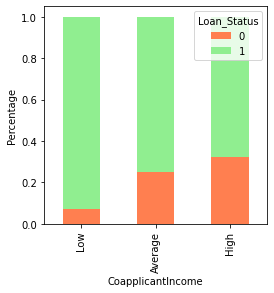

In [110]:
print(pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"]))
CoapplicantIncome_Bin = pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"])
CoapplicantIncome_Bin.div(CoapplicantIncome_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4),color=['coral','lightgreen'])
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.show()

In [111]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
bins =[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train["TotalIncome_bin"]=pd.cut(train["TotalIncome"],bins,labels=group)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Loan_Status       0    1
TotalIncome_bin         
Low              10    7
Average          20   58
High             43  113
Very High        53  105


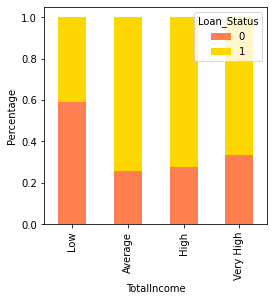

In [113]:
print(pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"]))
TotalIncome = pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"])
TotalIncome.div(TotalIncome.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4),color = ['coral','gold'])
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

In [114]:
bins = [0,100,200,700]
group=['Low','Average','High']
train["LoanAmount_bin"]=pd.cut(df["LoanAmount"],bins,labels=group)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Loan_Status      0    1
LoanAmount_bin         
Low             28   73
Average         76  183
High            22   27


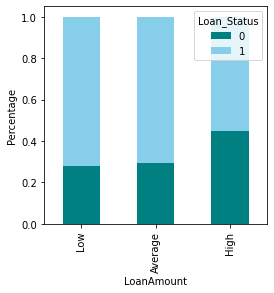

In [115]:
print(pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"]))
LoanAmount=pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"])
LoanAmount.div(LoanAmount.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4),color =['teal','skyblue'])
plt.xlabel("LoanAmount")
plt.ylabel("Percentage")
plt.show()

In [116]:
#Creating new feature (if total income is high chance of loan approval is more)
train['TotalIncome']= train['ApplicantIncome'] +train['CoapplicantIncome'] 

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

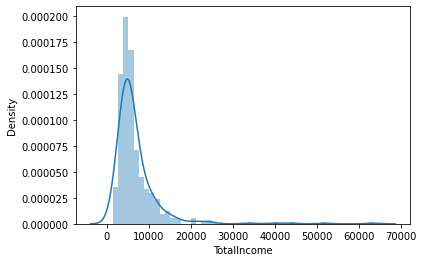

In [117]:
sns.distplot(train["TotalIncome"])

In [118]:
#Since the curve for TotalIncome is left skewed we take log transformation - reducing variability of data
train['TotalIncome_log']=np.log(train['TotalIncome'])

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalIncome_log', ylabel='Density'>

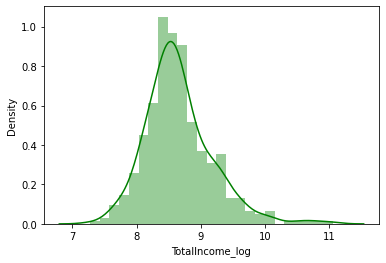

In [119]:
sns.distplot(train["TotalIncome_log"],color = 'green')

In [120]:
#creating the column in the test set as well
test["TotalIncome"]=test["ApplicantIncome"]+test["CoapplicantIncome"]
test['TotalIncome_log']=np.log(test['TotalIncome'])

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [121]:
#creating second feature EMI
train["EMI"]=train["LoanAmount"]/train["Loan_Amount_Term"]

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [122]:
#creating the column in the test set as well
test["EMI"]=test["LoanAmount"]/test["Loan_Amount_Term"]

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [123]:
#creating third feature Balance_Income
train["Balance_Income"] = train["TotalIncome"]-train["EMI"]*1000    # To make the units equal we multiply with 1000
test["Balance_Income"] = test["TotalIncome"]-test["EMI"]

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [124]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Loan_Status,LoanAmount_log,Income_bin,CoapplicantIncome_bin,TotalIncome,TotalIncome_bin,LoanAmount_bin,TotalIncome_log,EMI,Balance_Income
0,LP001002,1,0,0,1,0,5849,0.0,144.817259,360.0,...,1,4.975473,High,NaN,5849.0,High,Average,8.674026,0.402270,5446.729836
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,...,0,4.852030,High,Average,6091.0,Very High,Average,8.714568,0.355556,5735.444444
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,...,1,4.189655,Average,NaN,3000.0,Average,Low,8.006368,0.183333,2816.666667
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,...,1,4.787492,Average,Average,4941.0,High,Average,8.505323,0.333333,4607.666667
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,...,1,4.948760,High,NaN,6000.0,High,Average,8.699515,0.391667,5608.333333


In [125]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N,5.886104,81000.0,11.302204,1.000000,80999.000000
410,LP002318,Female,No,1,Not Graduate,Yes,3867,0.0,62.0,360.0,1.0,Semiurban,N,4.127134,3867.0,8.260234,0.172222,3866.827778
411,LP002319,Male,Yes,0,Graduate,No,6256,0.0,160.0,360.0,1.0,Urban,Y,5.075174,6256.0,8.741296,0.444444,6255.555556
412,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural,N,5.384495,6096.0,8.715388,0.605556,6095.394444
413,LP002332,Male,Yes,0,Not Graduate,No,2253,2033.0,110.0,360.0,1.0,Rural,Y,4.700480,4286.0,8.363109,0.305556,4285.694444


# Feature Selection

In [126]:
#Feature Selection - Filter Method 

In [127]:
len(train.columns)

22

In [128]:
train=train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [129]:
train=train.drop(['Income_bin','CoapplicantIncome_bin','LoanAmount_bin','TotalIncome','TotalIncome_bin','Loan_ID'],axis=1)   #Removing categorical data

In [130]:
Y_train = train['Loan_Status']
X_train = train.drop(['Loan_Status'],axis = 1)

In [131]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
0,1,0,0,1,0,1.0,2,4.975473,8.674026,0.402270,5446.729836
1,1,1,1,1,0,1.0,0,4.852030,8.714568,0.355556,5735.444444
2,1,1,0,1,1,1.0,2,4.189655,8.006368,0.183333,2816.666667
3,1,1,0,0,0,1.0,2,4.787492,8.505323,0.333333,4607.666667
4,1,0,0,1,0,1.0,2,4.948760,8.699515,0.391667,5608.333333


In [132]:
len(X_train.columns)

11

In [133]:
len(test.columns)

18

In [134]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'LoanAmount_log', 'TotalIncome_log',
       'EMI', 'Balance_Income'],
      dtype='object')

In [135]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log', 'EMI',
       'Balance_Income'],
      dtype='object')

In [136]:
test = test.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','TotalIncome'],axis = 1)

In [137]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
409,Male,Yes,3+,Graduate,No,0.0,Rural,N,5.886104,11.302204,1.000000,80999.000000
410,Female,No,1,Not Graduate,Yes,1.0,Semiurban,N,4.127134,8.260234,0.172222,3866.827778
411,Male,Yes,0,Graduate,No,1.0,Urban,Y,5.075174,8.741296,0.444444,6255.555556
412,Male,Yes,0,Not Graduate,No,0.0,Rural,N,5.384495,8.715388,0.605556,6095.394444
413,Male,Yes,0,Not Graduate,No,1.0,Rural,Y,4.700480,8.363109,0.305556,4285.694444


In [138]:
Y_train.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [139]:
from sklearn.feature_selection import VarianceThreshold
#Passing a value of zero for the parameter will filter all the features with zero variance
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
#the number of non-constant features.
len(X_train.columns[constant_filter.get_support()])

11

In [140]:
# transpose the feature matrice
X_train_T = X_train.T
# prints the number of duplicated features
print(X_train_T.duplicated().sum())
# select the duplicated features columns names
duplicated_columns = X_train_T[X_train_T.duplicated()].index.values

0


In [141]:
#There is no duplicate column present 
duplicated_columns

array([], dtype=object)

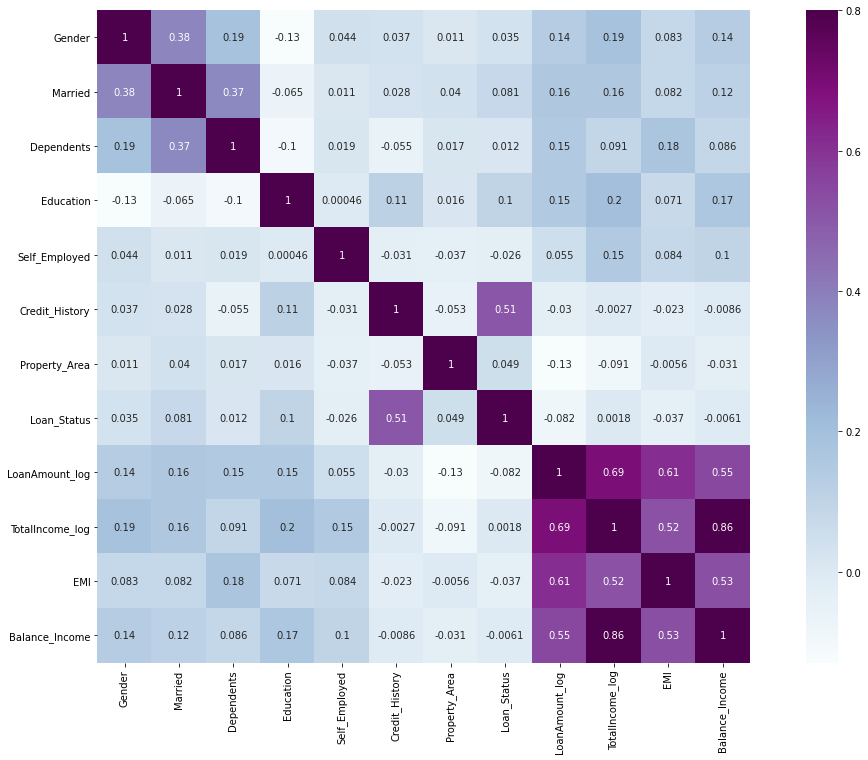

In [142]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

In [143]:
test.Gender=test.Gender.map({'Male':1,'Female':0})
test.Married=test.Married.map({'Yes':1,'No':0})
test.Dependents=test.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
test.Education=test.Education.map({'Graduate':1,'Not Graduate':0})
test.Self_Employed=test.Self_Employed.map({'Yes':1,'No':0})
test.Property_Area=test.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
test.Loan_Status=test.Loan_Status.map({'Y':1,'N':0})

In [144]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
409,1,1,3,1,0,0.0,0,0,5.886104,11.302204,1.000000,80999.000000
410,0,0,1,0,1,1.0,1,0,4.127134,8.260234,0.172222,3866.827778
411,1,1,0,1,0,1.0,2,1,5.075174,8.741296,0.444444,6255.555556
412,1,1,0,0,0,0.0,0,0,5.384495,8.715388,0.605556,6095.394444
413,1,1,0,0,0,1.0,0,1,4.700480,8.363109,0.305556,4285.694444


In [145]:
Y_test = test['Loan_Status']
X_test = test.drop(['Loan_Status'],axis=1)

In [146]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
409,1,1,3,1,0,0.0,0,0,5.886104,11.302204,1.000000,80999.000000
410,0,0,1,0,1,1.0,1,0,4.127134,8.260234,0.172222,3866.827778
411,1,1,0,1,0,1.0,2,1,5.075174,8.741296,0.444444,6255.555556
412,1,1,0,0,0,0.0,0,0,5.384495,8.715388,0.605556,6095.394444
413,1,1,0,0,0,1.0,0,1,4.700480,8.363109,0.305556,4285.694444


In [147]:
train.corr().loc['Loan_Status',:]

Gender             0.035219
Married            0.081146
Dependents         0.012340
Education          0.102356
Self_Employed     -0.025811
Credit_History     0.506291
Property_Area      0.049395
Loan_Status        1.000000
LoanAmount_log    -0.082481
TotalIncome_log    0.001802
EMI               -0.036668
Balance_Income    -0.006148
Name: Loan_Status, dtype: float64

In [148]:
def handling_correlation(df,threshold=0.8):
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = df.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [149]:
handling_correlation(X_train.copy(),0.85)                 

['Balance_Income']

In [150]:
#Feture Selection - Embedded Method

In [151]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh',color='coral')  
    return final_df

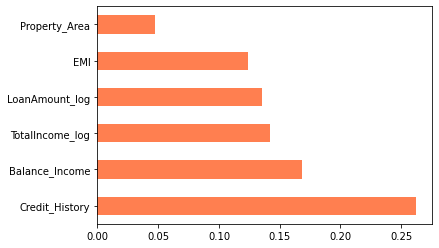

In [152]:
feature_importance=tree_based_feature_importance(X_train,Y_train) #features importance data frame

In [153]:
display(feature_importance) #ranking based on feature importance 

,Features,Importances
5,Credit_History,0.262412
10,Balance_Income,0.168666
8,TotalIncome_log,0.142162
7,LoanAmount_log,0.135195
9,EMI,0.124163
6,Property_Area,0.047316
2,Dependents,0.041718
1,Married,0.023458
0,Gender,0.020583
4,Self_Employed,0.018057


In [154]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
0,1,0,0,1,0,1.0,2,1,4.975473,8.674026,0.402270,5446.729836
1,1,1,1,1,0,1.0,0,0,4.852030,8.714568,0.355556,5735.444444
2,1,1,0,1,1,1.0,2,1,4.189655,8.006368,0.183333,2816.666667
3,1,1,0,0,0,1.0,2,1,4.787492,8.505323,0.333333,4607.666667
4,1,0,0,1,0,1.0,2,1,4.948760,8.699515,0.391667,5608.333333


In [155]:
#normalizing the data between 0-1  in order to make machine less bais and mL might take large values as important and may get baiased
import numpy as np

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [156]:
X_train['Balance_Income'] = NormalizeData(X_train['Balance_Income'] )
X_test['Balance_Income'] = NormalizeData(X_test['Balance_Income'] )

In [157]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
0,1,0,0,1,0,1.0,2,4.975473,8.674026,0.402270,0.102073
1,1,1,1,1,0,1.0,0,4.852030,8.714568,0.355556,0.106772
2,1,1,0,1,1,1.0,2,4.189655,8.006368,0.183333,0.059265
3,1,1,0,0,0,1.0,2,4.787492,8.505323,0.333333,0.088416
4,1,0,0,1,0,1.0,2,4.948760,8.699515,0.391667,0.104703
...,...,...,...,...,...,...,...,...,...,...,...
404,0,0,0,1,1,1.0,0,5.267858,8.914761,0.538889,0.125761
405,0,0,0,1,0,1.0,1,4.744932,8.422223,0.319444,0.082229
406,1,1,0,0,0,1.0,2,4.744932,8.426612,0.319444,0.082555
407,0,0,0,0,0,1.0,0,4.189655,7.702104,0.183333,0.046456


In [158]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
409,1,1,3,1,0,0.0,0,5.886104,11.302204,1.000000,1.000000
410,0,0,1,0,1,1.0,1,4.127134,8.260234,0.172222,0.025114
411,1,1,0,1,0,1.0,2,5.075174,8.741296,0.444444,0.055305
412,1,1,0,0,0,0.0,0,5.384495,8.715388,0.605556,0.053281
413,1,1,0,0,0,1.0,0,4.700480,8.363109,0.305556,0.030408
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,1.0,0,4.262680,7.972466,0.197222,0.012892
610,1,1,3,1,0,1.0,0,3.688879,8.320205,0.222222,0.028134
611,1,1,1,1,0,1.0,2,5.533389,9.025456,0.702778,0.081288
612,1,1,2,1,0,1.0,2,5.231109,8.933664,0.519444,0.072077


In [159]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

In [160]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_

# Classification Algorithm (Modelling)

# Logistic Regression 

In [161]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [162]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [163]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [164]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(Y_pred, Y_test))

The accuracy of Logistic Regression is:  0.6780487804878049


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


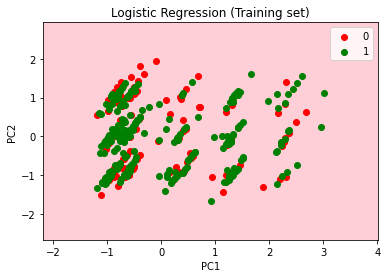

In [165]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


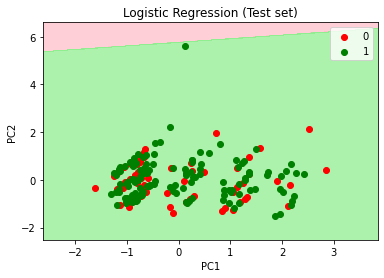

In [166]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## KNN

In [167]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [168]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [169]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [170]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred, Y_test))

The accuracy of KNN is:  0.5902439024390244


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


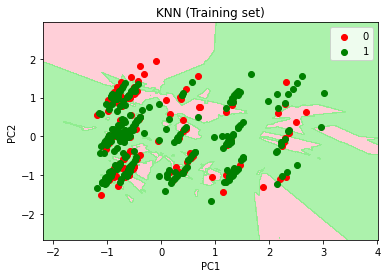

In [171]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


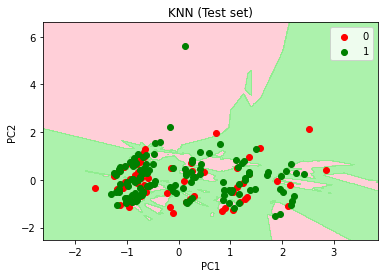

In [172]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## SVM

In [173]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [174]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [175]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [176]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of SVM is: ', metrics.accuracy_score(y_pred, Y_test))

The accuracy of SVM is:  0.6780487804878049


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


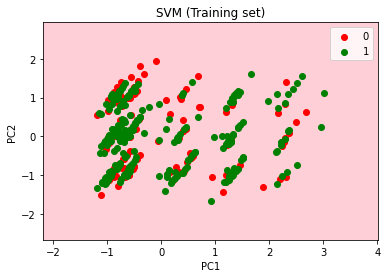

In [177]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


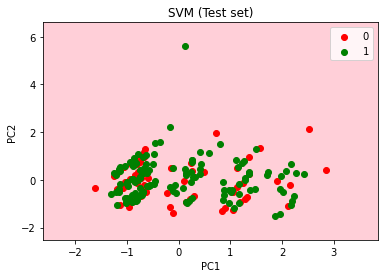

In [178]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Decision Tree Classification


In [179]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [180]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [181]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Decision Tree Classifier is: ', metrics.accuracy_score(y_pred, Y_test))

The accuracy of Decision Tree Classifier is:  0.5121951219512195


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


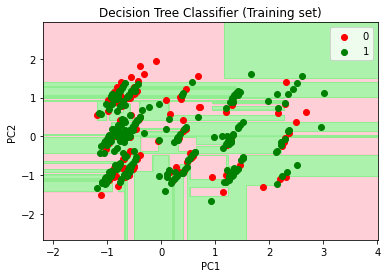

In [182]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


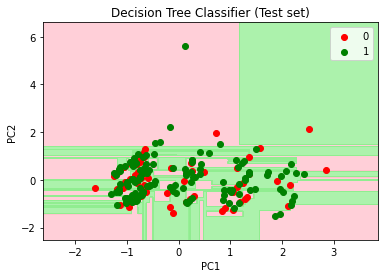

In [183]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Random Forest Classification

In [184]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [185]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [186]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Random Forest Classification is: ', metrics.accuracy_score(y_pred, Y_test))

The accuracy of Random Forest Classification is:  0.526829268292683


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


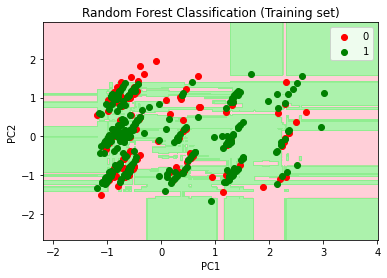

In [187]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


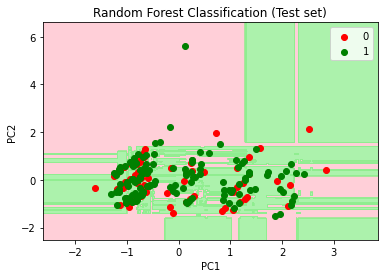

In [188]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Results:
The accuracy of Logistic Regression is: 67.80 %

The accuracy of KNN is: 59.02 %

The accuracy of SVM is: 67.80 %

The accuracy of Decision Tree Classifier is: 51.22 %

The accuracy of Random Forest Classification is: 52.68 %